table of contents
1. Prepare
2. Data Import, Encoding
3. EDA
4. write df

# Prepare

## Import Library

In [1]:
import os, random, time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

cmap = plt.get_cmap('tab10')

## Change matplotlib setting

In [18]:
import matplotlib as mpl

mode = 'twitter'

if mode == 'go_ando':
    # go ando mode
    mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = mpl.rcParams['axes.labelcolor'] =  'darkgrey'
    mpl.rcParams['grid.color'] = mpl.rcParams['axes.edgecolor'] = mpl.rcParams['text.color']  = 'darkgrey'
    mpl.rcParams['axes.spines.top'] = mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.grid.axis'] = 'y'
    mpl.rcParams['axes.grid'] = True
    mpl.rcParams['axes.facecolor'] = mpl.rcParams['figure.facecolor'] = 'white'
elif mode == 'twitter':
    # twitter mode
    mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = mpl.rcParams['axes.labelcolor'] =  'white'
    mpl.rcParams['grid.color'] = mpl.rcParams['axes.edgecolor'] = mpl.rcParams['text.color']  = 'white'
    mpl.rcParams['axes.spines.top'] = mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.grid.axis'] = 'y'
    twitter_color = '#141d26'
    mpl.rcParams['axes.facecolor'] = mpl.rcParams['figure.facecolor'] = twitter_color
    
else:
    pass

## define parameter

In [2]:
base_dir = os.path.join('..','..')
data_dir = os.path.join(base_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')

infile_list = os.listdir(raw_dir)
for i, infile in enumerate(infile_list):
    print(i, infile)

0 referees.json
1 teams.json
2 matches
3 competitions.json
4 events
5 players.json
6 coaches.json


# Data Import, Encoding

## Data Import

In [3]:
infile_list = os.listdir(os.path.join(raw_dir, 'events'))
df_dict = {}
for infile in infile_list:
    df = pd.read_json(os.path.join(raw_dir, 'events', infile))
    df_dict[infile.split('.')[0]] = df

## check data

In [4]:
for k, df in df_dict.items():
    print(k)
    display(df.head())

events_France


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,1.935181,176505119,2500686,1H,253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",85,Simple pass,[{'id': 1801}],3799
1,8,Pass,3.599295,176505121,2500686,1H,29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",83,High pass,[{'id': 1801}],3799
2,1,Duel,6.827043,176505122,2500686,1H,253784,"[{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3799
3,1,Duel,6.985577,176505017,2500686,1H,56441,"[{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",3772
4,1,Duel,9.511272,176505124,2500686,1H,366760,"[{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]",11,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",3799


events_Spain


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.994582,180864419,2565548,1H,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",85,Simple pass,[{'id': 1801}],682
1,8,Pass,3.137020,180864418,2565548,1H,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",85,Simple pass,[{'id': 1801}],682
2,8,Pass,6.709668,180864420,2565548,1H,364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",85,Simple pass,[{'id': 1801}],682
3,8,Pass,8.805497,180864421,2565548,1H,3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",85,Simple pass,[{'id': 1801}],682
4,8,Pass,14.047492,180864422,2565548,1H,3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",85,Simple pass,[{'id': 1801}],682


events_Germany


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.409746,179896442,2516739,1H,15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",85,Simple pass,[{'id': 1801}],2446
1,8,Pass,2.506082,179896443,2516739,1H,14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",85,Simple pass,[{'id': 1801}],2446
2,8,Pass,6.946706,179896444,2516739,1H,14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",85,Simple pass,[{'id': 1801}],2446
3,8,Pass,10.786491,179896445,2516739,1H,14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",85,Simple pass,[{'id': 1801}],2446
4,8,Pass,12.684514,179896446,2516739,1H,14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",85,Simple pass,[{'id': 1801}],2446


events_European_Championship


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,1.255990,88178642,1694390,1H,26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",85,Simple pass,[{'id': 1801}],4418
1,8,Pass,2.351908,88178643,1694390,1H,3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",85,Simple pass,[{'id': 1801}],4418
2,8,Pass,3.241028,88178644,1694390,1H,31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",85,Simple pass,[{'id': 1801}],4418
3,8,Pass,6.033681,88178645,1694390,1H,7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",83,High pass,[{'id': 1802}],4418
4,1,Duel,13.143591,88178646,1694390,1H,25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",12,Ground defending duel,"[{'id': 702}, {'id': 1801}]",4418


events_World_Cup


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,1.656214,258612104,2057954,1H,122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",85,Simple pass,[{'id': 1801}],16521
1,8,Pass,4.487814,258612106,2057954,1H,139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",83,High pass,[{'id': 1801}],16521
2,1,Duel,5.937411,258612077,2057954,1H,103668,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",14358
3,1,Duel,6.406961,258612112,2057954,1H,122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",16521
4,8,Pass,8.562167,258612110,2057954,1H,122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",85,Simple pass,[{'id': 1801}],16521


events_Italy


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.530536,180423957,2575959,1H,8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",85,Simple pass,[{'id': 1801}],3158
1,8,Pass,3.768418,180423958,2575959,1H,20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",85,Simple pass,[{'id': 1801}],3158
2,7,Others on the ball,4.868265,180423959,2575959,1H,8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",72,Touch,[],3158
3,1,Duel,8.114676,180423960,2575959,1H,8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",11,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",3158
4,1,Duel,8.647892,180423961,2575959,1H,8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",11,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",3158


events_England


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


# EDA

In [5]:
for k, df in df_dict.items():
    print(f'{k}')
    print(f'\t- Number of matches = {len(df.id.unique())}')
    print(f'\t- Number of rows = {len(df)}')
    print(f'\t- Number of eventId = {len(df.eventId.unique())}')
    print(f'\t- Number of subEventId = {len(df.subEventId.unique())}')

events_France
	- Number of matches = 632807
	- Number of rows = 632807
	- Number of eventId = 10
	- Number of subEventId = 36
events_Spain
	- Number of matches = 628659
	- Number of rows = 628659
	- Number of eventId = 10
	- Number of subEventId = 36
events_Germany
	- Number of matches = 519407
	- Number of rows = 519407
	- Number of eventId = 10
	- Number of subEventId = 36
events_European_Championship
	- Number of matches = 78140
	- Number of rows = 78140
	- Number of eventId = 10
	- Number of subEventId = 35
events_World_Cup
	- Number of matches = 101759
	- Number of rows = 101759
	- Number of eventId = 9
	- Number of subEventId = 34
events_Italy
	- Number of matches = 647372
	- Number of rows = 647372
	- Number of eventId = 10
	- Number of subEventId = 36
events_England
	- Number of matches = 643150
	- Number of rows = 643150
	- Number of eventId = 10
	- Number of subEventId = 36


In [6]:
df.subEventName.unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [7]:
df.eventName.unique()

array(['Pass', 'Duel', 'Foul', 'Free Kick', 'Shot', 'Save attempt',
       'Others on the ball', 'Interruption', 'Goalkeeper leaving line',
       'Offside'], dtype=object)

# visualize pass line

KeyError: ('positions', 'subEventName')

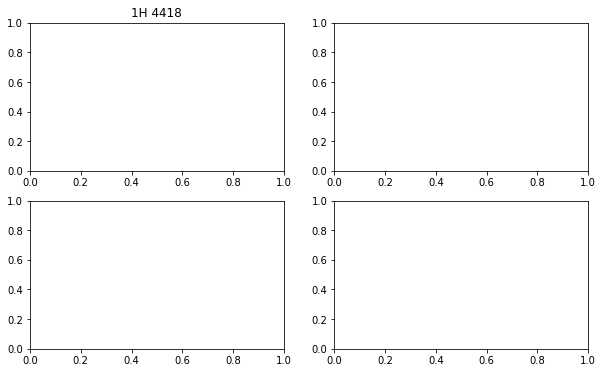

In [24]:
df = df_dict['events_European_Championship']

matchId_list = df.matchId.unique().tolist()
matchId = matchId_list[0]

df_tmp = df[(df.matchId == matchId)&(df.eventName=='Pass')]

subEventName_list = df_tmp.subEventName.unique().tolist()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

x_list, y_list = [], []

for i, (matchPeriod, teamId) in enumerate(df_tmp[['matchPeriod', 'teamId']].drop_duplicates().sort_values(by=['teamId', 'matchPeriod']).values.tolist()):
    ax = axes[int(i/2), i%2]
    ax.set_title(f'{matchPeriod} {teamId}')
    for positions, subEventName in df_tmp[(df_tmp.matchPeriod==matchPeriod)&(df_tmp.teamId==teamId)]['positions', 'subEventName'].tolist():
        ax.annotate('', xy=list(positions[1].values()), xytext=list(positions[0].values()),
                arrowprops=dict(shrink=0, width=0.5, headwidth=4, alpha=0.8,  
                                headlength=5, connectionstyle='arc3',
                                facecolor=cmap(subEventName_list.index(subEventName)), edgecolor=cmap(subEventName_list.index(subEventName)))
               )
        
        x_list.append(list(positions[1].values())[1]); x_list.append(list(positions[0].values())[1])
        y_list.append(list(positions[1].values())[0]); y_list.append(list(positions[0].values())[0])
        
#     ax.set_xlim([np.min(x_list), np.max(x_list)])
    ax.set_xlim([0, 100])
#     ax.set_ylim([np.min(y_list), np.max(y_list)])
    ax.set_ylim([0, 100])

# write df

In [15]:
for k, df in df_dict.items():
    df.to_csv(os.path.join(processed_dir, 'events', f'{k}.csv'), index=False)